In [1]:
import cv2 as cv
import numpy as np
import os

In [2]:
path = 'D:/Image Classification Self/Data/Characters Classification/data/extracted_images/'

In [3]:
classes = {'!':0, '(':1, ')':2, '+':3, ',':4, '-':5, '0':6, '1':7, '2':8, '3':9, '4':10, '5':11, '6':12, '7':13, '8':14, '9':15,
           '=':16, 'A':17, 'alpha':18, 'ascii_124':19, 'b':20, 'beta':21, 'C':22, 'cos':23, 'd':24, 'Delta':25, 'div':26, 
           'e':27, 'exists':28, 'f':29, 'forall':30, 'forward_slash':31, 'G':32, 'gamma':33, 'geq':34, 'gt':35, 'H':36, 'i':37,
           'in':38, 'infty':39, 'int':40, 'j':41, 'k':42, 'l':43, 'lambda':44, 'ldots':45, 'leq':46, 'lim':47, 'log':48,
           'lt':49, 'M':50, 'mu':51, 'N':52, 'neq':53, 'o':54, 'p':55, 'phi':56, 'pi':57, 'pm':58, 'prime':59, 'q':60, 'R':61,
           'rightarrow':62, 'S':63, 'sigma':64, 'sin':65, 'sqrt':66, 'sum':67, 'T':68, 'tan':69, 'theta':70, 'times':71, 
           'u':72, 'v':73, 'w':74, 'X':75, 'y':76, 'z':77, '[':78, ']':79, '{':80, '}':81}

In [4]:
images = []
labels = []

def load_data(path):
    for folders in os.listdir(path):
        for files in os.listdir(path + folders + '/'):
            image = cv.imread(path + folders + '/' + files)
            if image is None:
                continue
            image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
            image = cv.resize(image, (45, 45))
            image = image.astype('float32')/255.0
            label = classes[str(folders)]
            images.append(image)
            labels.append(label)
    images_r = np.array(images).reshape((len(images), 45, 45, 1))
    labels_r = np.array(labels)
    return images_r, labels_r

In [5]:
images, labels = load_data(path)

In [6]:
images.shape, labels.shape

((375974, 45, 45, 1), (375974,))

In [7]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size=0.1, random_state=123)

In [9]:
Y_train_req = to_categorical(Y_train)
Y_test_req = to_categorical(Y_test)

print(X_train.shape, X_test.shape, Y_train_req.shape, Y_test_req.shape)

(338376, 45, 45, 1) (37598, 45, 45, 1) (338376, 82) (37598, 82)


In [10]:
del images
del labels

In [11]:
from tensorflow.keras.layers import Conv2D, Flatten, BatchNormalization, Input, Dense, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential

In [12]:
model = Sequential()
model.add(Input((45, 45, 1)))

model.add(Conv2D(6, (5,5), strides=1, padding='same', kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=2))

model.add(Conv2D(16, (5,5), strides=1, padding='same', kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=2))

model.add(Flatten())
model.add(Dense(120, kernel_initializer='he_normal', activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(82, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 45, 45, 6)         156       
_________________________________________________________________
batch_normalization (BatchNo (None, 45, 45, 6)         24        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 16)        2416      
_________________________________________________________________
batch_normalization_1 (Batch (None, 22, 22, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1936)              0

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
history = model.fit(X_train, Y_train_req, epochs=50, batch_size=128, validation_split=0.1)

Train on 304538 samples, validate on 33838 samples
Epoch 1/50
304538/304538 [==============================] - 28s 91us/sample - loss: 0.4190 - accuracy: 0.8880 - val_loss: 0.2097 - val_accuracy: 0.9366
Epoch 2/50
304538/304538 [==============================] - 27s 89us/sample - loss: 0.1301 - accuracy: 0.9603 - val_loss: 0.1316 - val_accuracy: 0.9583
Epoch 3/50
304538/304538 [==============================] - 29s 95us/sample - loss: 0.0810 - accuracy: 0.9740 - val_loss: 0.2694 - val_accuracy: 0.9078
Epoch 4/50
304538/304538 [==============================] - 30s 99us/sample - loss: 0.0595 - accuracy: 0.9805 - val_loss: 0.2401 - val_accuracy: 0.9285
Epoch 5/50
304538/304538 [==============================] - 31s 103us/sample - loss: 0.0491 - accuracy: 0.9839 - val_loss: 1.5666 - val_accuracy: 0.7438
Epoch 6/50
304538/304538 [==============================] - 32s 106us/sample - loss: 0.0420 - accuracy: 0.9858 - val_loss: 0.0767 - val_accuracy: 0.9764
Epoch 7/50
304538/304538 [=========

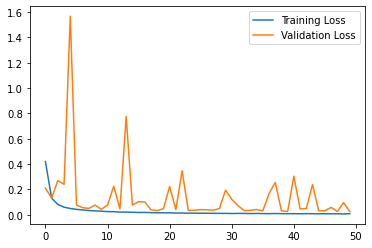

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'], loc='best')
plt.show()

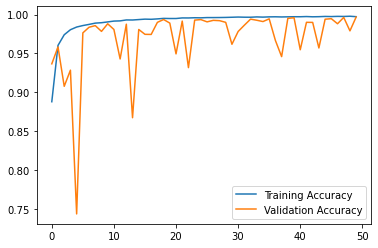

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='best')
plt.show()

In [18]:
model.evaluate(X_test, Y_test_req)

37598/37598 [==============================] - 7s 195us/sample - loss: 0.0270 - accuracy: 0.9965


[0.02704501465225797, 0.99651575]